In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:907: UserWarning: Duplicate key in file "/etc/matplotlibrc", line #469
  (fname, cnt))


# $U(x_1, x_2, x_3) = \frac{q V^2}{m \Omega_{RF}^2 r_0^4}(x_1^2 + x_2^2 + 4 x_3^2)$

In [2]:
q = 1.6e-19
V = 200
m = 2.89e-25
omegaRF = 2*np.pi*40e6
rnot = 512e-6
A = q**2 * V**2/(m * omegaRF**2 * rnot**4)
wsec = np.sqrt(2*A/m)
print 'Secular freq = ', wsec/2/np.pi

Secular freq =  378274.863649


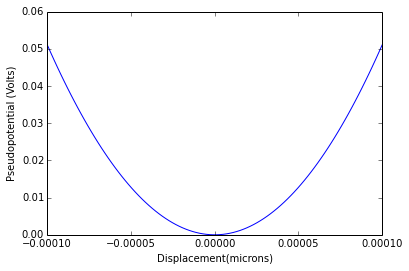

In [3]:
x = np.linspace(-100e-6,100e-6,100)
y = np.linspace(100e-6,-100e-6,100)
xx, yy = np.meshgrid(x,y)
phi = A*(xx**2 + yy**2)
plt.plot(x, A/q*x**2)
plt.ylabel('Pseudopotential (Volts)')
plt.xlabel('Displacement(microns)')
plt.show()


In [4]:
epsilon = 8.8e-12

def ion_distance(ion1, ion2):
    d = np.sqrt((ion1.x - ion2.x)**2 + (ion1.y - ion2.y)**2)
    return d

def interaction_energy(particle, otherions):
    Eint = 0
    for otherion in otherions:
        x_sep = otherion.x - particle.x
        y_sep = otherion.y - particle.y
        d = np.sqrt(x_sep**2 + y_sep**2)
        Eint += q**2/(4 * np.pi * epsilon * d)
    return 0.5 * Eint

def pos_energy(particle):
    pos_E = A * (particle.x**2 + particle.y**2 )
    return pos_E

def total_energy(ions):
    E_tot = 0
    for i, particle in enumerate(ions):
        otherions = ions[:i] + ions[i+1 :]
        E_tot += interaction_energy(particle, otherions)
        E_tot += pos_energy(particle)
    return E_tot
    

def plot_ions(ions, colors = None):
    x = []
    y = []
    for i, particle in enumerate(ions):
        x.append(particle.x * 1e6)
        y.append(particle.y * 1e6)
    plt.axis('equal')
    #plt.axis([-25e-6, 25e-6, -25e-6, 25e-6])
    if colors:
        plt.scatter(x,y, c = colors) # in microns
    else: 
        plt.scatter(x,y)
    
class ion():
    def __init__(self, x0 = 0, y0= 0, ax0=0,ay0=0, constant = False):
        self.x0= x0
        self.x = self.x0
        self.y0 = y0
        self.y = self.y0
        self.constant = constant

# $$\ddot{\vec{x}}_{ij} = \frac{-2qA}{m}x_{ij} - \frac{q^2}{4 \pi \epsilon_0}\sum_{k\neq j}^{N} \frac{\hat{x}_{ij}\cdot \hat{r}}{|\vec{x}_k-\vec{x}_j|^2}$$

<built-in function iter>
ion:  0
Starting position: (-3.8460771938319724e-05, 1.5846820347250772e-05)
Final Pos (-4.434888418116222e-06, 1.530909326714452e-07)
ion:  1
Starting position: (-4.631797561862735e-05, -4.707329928541967e-05)
Final Pos (-5.1413542241628205e-06, -8.592304667405243e-06)
ion:  2
Starting position: (-6.768048926982722e-05, 2.540204885603048e-05)
Final Pos (-8.577553120129691e-06, 5.222441402504719e-06)
ion:  3
Starting position: (7.652856787947994e-05, 3.185227193173369e-05)
Final Pos (9.973599486490386e-06, 2.799606882718363e-06)
ion:  4
Starting position: (6.740600383953164e-05, 4.155858743893161e-05)
Final Pos (5.201792799368177e-06, 8.532255381090413e-06)
ion:  5
Starting position: (-6.912004859507307e-06, 7.043621622109143e-05)
Final Pos (-2.7442537193601204e-06, 9.947129034188524e-06)
ion:  6
Starting position: (5.0999691931259526e-05, 2.8017066045268958e-05)
Final Pos (4.417760992800987e-06, -9.736640954727184e-08)
ion:  7
Starting position: (3.30027542401

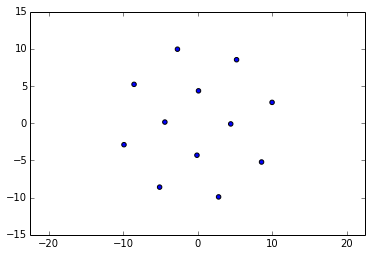

In [5]:
N = 12
pos_spread = 160e-6
number_iters = 5000
step_size = pos_spread*.008

ions = []
for i in range(N):
    x0 = (np.random.rand() - 0.5)*pos_spread
    y0 = (np.random.rand() - 0.5)*pos_spread
    ions.append(ion(x0,y0))

E0 = total_energy(ions)
    
iters = 0
E = [E0]
last_E = E0

while iters < number_iters:
    iters +=1
    for i, particle in enumerate(ions):
        if particle.constant == False:
            particle.lastx = particle.x
            particle.x = particle.x + (np.random.rand() - 0.5)*step_size
            particle.lasty = particle.y
            particle.y = particle.y + (np.random.rand() - 0.5)*step_size
            tot_E = total_energy(ions)
            if tot_E < last_E:
                E.append(tot_E)
                last_E = tot_E
            else:
                particle.x = particle.lastx
                particle.y = particle.lasty
        
print iter
for k, particle in enumerate(ions):
    print "ion: ", k
    print "Starting position:",str((particle.x0, particle.y0))
    print "Final Pos", str((particle.x, particle.y))
#r = np.transpose(np.sqrt(np.array(posx)**2 + np.array(posy)**2))
#print 
#plt.plot(E)

#print 'iterations = ',len(E)
#print 'Final Energy = ', E[-1]
#plt.show() 
#plt.plot(r, '--')
#plt.xlim([iter - 50,iter])
#plt.ylim([0.5*np.min(r[iter-50:iter]), 2*np.max(r[iter-50:iter])])
#plt.show()rate(ions)
plot_ions(ions)
plt.savefig('simulated_%s_ion_.pdf' % str(N))
plt.show() 

In [6]:
E[-1]

2.2164860996050594e-21

In [7]:
E[-1]

2.2164860996050594e-21

In [8]:
E[-1]

2.2164860996050594e-21

In [9]:
E[-1]

2.2164860996050594e-21

In [10]:
energys = np.array([5.929195, 5.955422, 5.97648, 5.9719]) * 1e-22 - 5.929195 * 1e-22

In [11]:
freq = energys/6.6e-34
print freq

[  0.00000000e+00   3.97378788e+09   7.16439394e+09   6.47045455e+09]


In [12]:
distance = [2,4,5,7]
print freq[-2] - freq[-1]

693939393.939


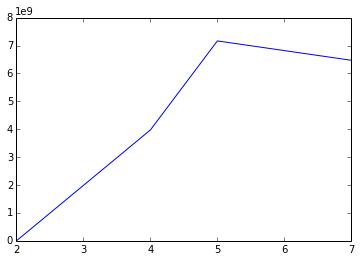

In [13]:
plt.plot(distance, freq)